In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [2]:
df = pd.read_csv("Mall_Customer_Segmentation_Data.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df.drop(columns=['CustomerID'],axis=1,inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


C:\Users\kesar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kesar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kesar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kesar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

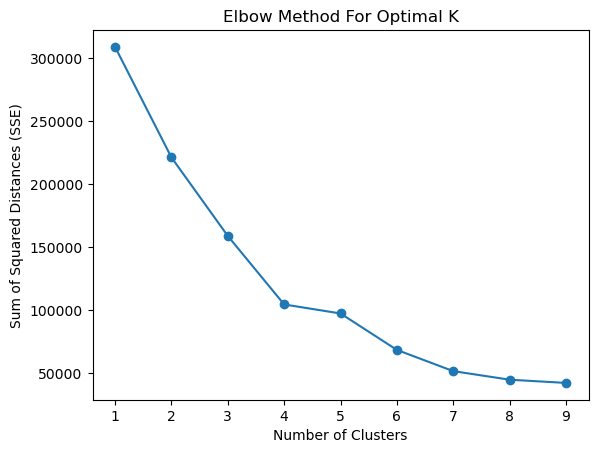

In [4]:
sse = []
k_range = range(1,10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)
    
# Plot the elbow curve
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method For Optimal K')
plt.show()

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)

df['cluster'] = kmeans.fit_predict(df)

C:\Users\kesar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
cluster_labels = {
    0: "Low Income – Low Spending",
    1: "High Income – High Spending",
    2: "Young Low Income – High Spending"
}

df['Segment'] = df['cluster'].map(cluster_labels)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,Segment
0,1,19,15,39,2,Young Low Income – High Spending
1,1,21,15,81,2,Young Low Income – High Spending
2,0,20,16,6,0,Low Income – Low Spending
3,0,23,16,77,2,Young Low Income – High Spending
4,0,31,17,40,2,Young Low Income – High Spending
...,...,...,...,...,...,...
195,0,35,120,79,1,High Income – High Spending
196,0,45,126,28,1,High Income – High Spending
197,1,32,126,74,1,High Income – High Spending
198,1,32,137,18,1,High Income – High Spending


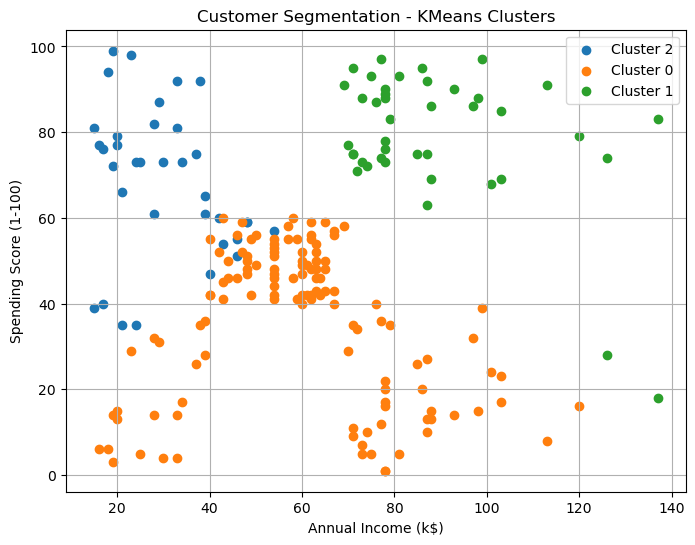

In [7]:
# Simple scatter plot
plt.figure(figsize=(8, 6))
for cluster in df['cluster'].unique():
    clustered = df[df['cluster'] == cluster]
    plt.scatter(clustered['Annual Income (k$)'], clustered['Spending Score (1-100)'], label=f'Cluster {cluster}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation - KMeans Clusters')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Using silhouette score (measures how similar a point is to its own cluster compared to other clusters)
features = df[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']]

silhouette_avg = silhouette_score(features, df['cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.34


In [9]:
import pickle

pickle.dump(kmeans,open("kmeans.pkl",'wb'))
kmeans = pickle.load(open("kmeans.pkl",'rb'))

In [10]:
# Define cluster labels
cluster_labels = {
    0: "Low Income – Low Spending",
    1: "High Income – High Spending",
    2: "Young Low Income – High Spending"
}

# Function to predict customer segment
def predict_customer_segment(gender, age, income, spending_score):
    # Prepare input as a NumPy array
    new_data = np.array([[gender, age, income, spending_score]])
    
    # Predict cluster
    cluster = kmeans.predict(new_data)[0]
    
    # Map to segment
    segment = cluster_labels.get(cluster, "Unknown Segment")
    
    # Print result
    print(f"Predicted Cluster: {cluster}")
    print(f"Customer Segment: {segment}")

In [11]:
# Example usage
predict_customer_segment(gender=1, age=28, income=50, spending_score=60)

Predicted Cluster: 2
Customer Segment: Young Low Income – High Spending


C:\Users\kesar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [12]:
# Example usage
predict_customer_segment(gender=0, age=15, income=20, spending_score=10)

Predicted Cluster: 0
Customer Segment: Low Income – Low Spending


C:\Users\kesar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
